Відрізок 1:
S_0(x) = 3.34 + 4.8470(x - 0.2) + 0.0000(x - 0.2)^2 + -11.6999(x - 0.2)^3, x належить [0.2, 0.6]
Відрізок 2:
S_1(x) = 4.53 + -0.7690(x - 0.6) + -14.0399(x - 0.6)^2 + 16.9156(x - 0.6)^3, x належить [0.6, 1.1]
Відрізок 3:
S_2(x) = 2.75 + -2.1221(x - 1.1) + 11.3335(x - 1.1)^2 + -8.4780(x - 1.1)^3, x належить [1.1, 1.8]
Відрізок 4:
S_3(x) = 3.91 + 3.0258(x - 1.8) + -6.4702(x - 1.8)^2 + -2.6959(x - 1.8)^3, x належить [1.8, 2.6]
Значення сплайна:
x = 0.20, y = 3.340
x = 0.22, y = 3.568
x = 0.25, y = 3.772
x = 0.27, y = 3.951
x = 0.30, y = 4.108
x = 0.32, y = 4.243
x = 0.35, y = 4.357
x = 0.37, y = 4.451
x = 0.39, y = 4.526
x = 0.42, y = 4.582
x = 0.44, y = 4.622
x = 0.47, y = 4.646
x = 0.49, y = 4.654
x = 0.52, y = 4.648
x = 0.54, y = 4.629
x = 0.56, y = 4.598
x = 0.59, y = 4.555
x = 0.61, y = 4.502
x = 0.64, y = 4.440
x = 0.66, y = 4.369
x = 0.68, y = 4.291
x = 0.71, y = 4.206
x = 0.73, y = 4.116
x = 0.76, y = 4.021
x = 0.78, y = 3.923
x = 0.81, y = 3.822
x = 0.83, y = 3.719
x =

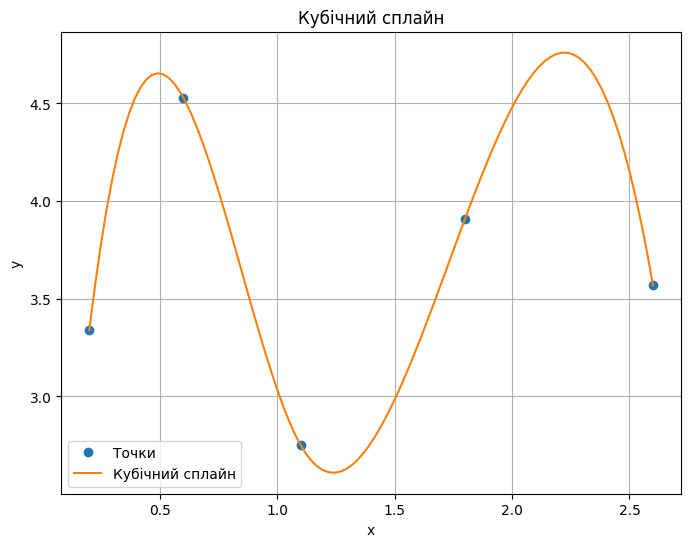

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Задані точки
x = np.array([0.2, 0.6, 1.1, 1.8, 2.6])
y = np.array([3.34, 4.53, 2.75, 3.91, 3.57])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

# Обчислення коефіцієнтів сплайна
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])

for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i]:.4f}(x - {x[i]}) + {c[i]:.4f}(x - {x[i]})^2 + {d[i]:.4f}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

#Значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()
